# **Import Library**

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris



# **Load datasets**

In [44]:
#  Membuat dataset iris dari scikit-learn dan mengkonversi ke DataFrame
iris = load_iris()
X = iris.data    # merupakan input untuk machine learning
y = iris.target  # merupakan output yang diinginkan dari machine learning

# melakukan konversi data fitur dan target menjadi DataFrame
df_X = pd.DataFrame(X, columns=iris.feature_names)
df_y = pd.Series(y, name='target')

# menggabungkan fitur dan target dalam satu DataFrame
df = pd.concat([df_X, df_y], axis=1)

df.head(11)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


# **Cek datasets**

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


# **Split Data**

In [46]:
# Split dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)



# **List Model Machine Learning**

In [47]:
# List model yang akan diuji
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(probability=True),  # SVM harus pakai probability=True biar bisa hitung AUC
    "Naive Bayes": GaussianNB()
}

# **Prediksi dan Evaluasi**

In [48]:
# Dictionary untuk menyimpan hasil akurasi
results = []

# Looping tiap model buat training & evaluasi
for name, model in models.items():
    model.fit(X_train, y_train)  # Latih model
    y_pred = model.predict(X_test)  # Prediksi
    y_pred_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None  # Probabilitas prediksi

    # Hitung metrik
    acc = accuracy_score(y_test, y_pred) * 100
    prec = precision_score(y_test, y_pred, average='macro') * 100
    rec = recall_score(y_test, y_pred, average='macro') * 100
    f1 = f1_score(y_test, y_pred, average='macro') * 100
    auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr") * 100 if y_pred_proba is not None else None

    # Simpan hasil evaluasi
    results.append([name, acc, prec, rec, f1, auc])

# Konversi hasil ke DataFrame buat visualisasi
df_results = pd.DataFrame(results, columns=["Model", "Accuracy (%)", "Precision (%)", "Recall (%)", "F1-Score (%)", "AUC (%)"])

# Tampilkan hasil dalam bentuk tabel
print(df_results)


                 Model  Accuracy (%)  Precision (%)  Recall (%)  F1-Score (%)  \
0  Logistic Regression     93.333333      94.871795   93.939394     93.888889   
1                  KNN     96.666667      97.222222   96.969697     96.963423   
2        Decision Tree     93.333333      94.871795   93.939394     93.888889   
3        Random Forest     90.000000      92.857143   90.909091     90.736842   
4                  SVM    100.000000     100.000000  100.000000    100.000000   
5          Naive Bayes     93.333333      94.871795   93.939394     93.888889   

      AUC (%)  
0  100.000000  
1   99.681021  
2   95.215311  
3   99.521531  
4  100.000000  
5   99.043062  


# **Visualisasi Data**

<Figure size 1200x600 with 0 Axes>

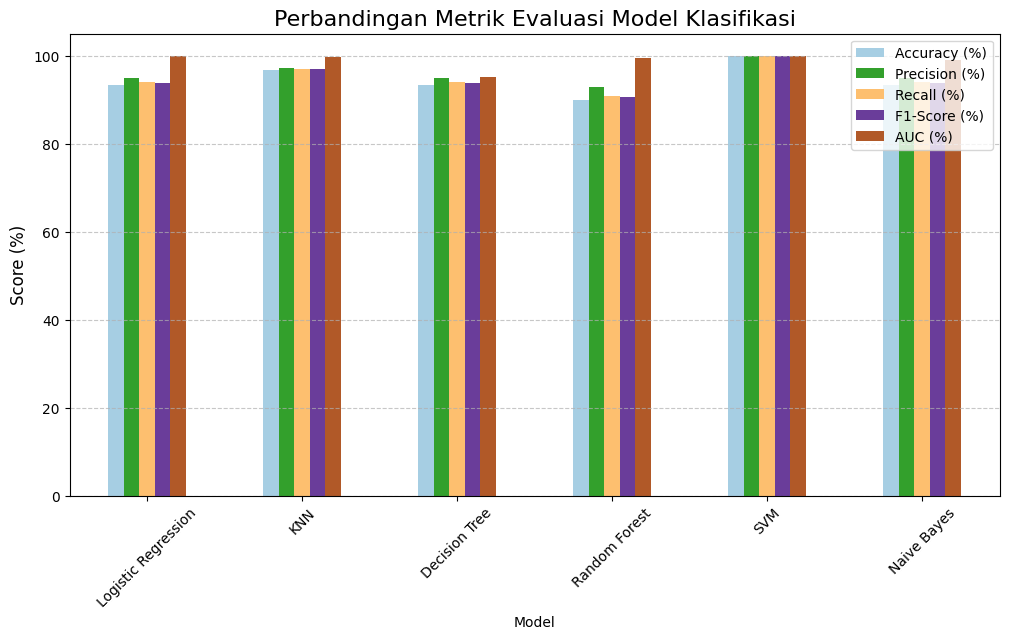

In [54]:
# Visualisasi hasil dalam bentuk bar chart
plt.figure(figsize=(12, 6))
df_results.set_index("Model").plot(kind="bar", figsize=(12, 6), colormap="Paired")
plt.title("Perbandingan Metrik Evaluasi Model Klasifikasi", fontsize=16)
plt.ylabel("Score (%)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(loc="best")
plt.show()